<a href="https://colab.research.google.com/github/chandana2005/OIBSIP/blob/main/Task03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")

In [ ]:
data = pd.read_csv('/content/car_price_prediction.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [ ]:
data.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
90%,2017.000000,9.500000,14.790000,65000.000000,0.000000
95%,2017.000000,14.500000,22.780000,80000.000000,0.000000
99%,2017.000000,23.000000,35.960000,142000.000000,1.000000


In [ ]:
data.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


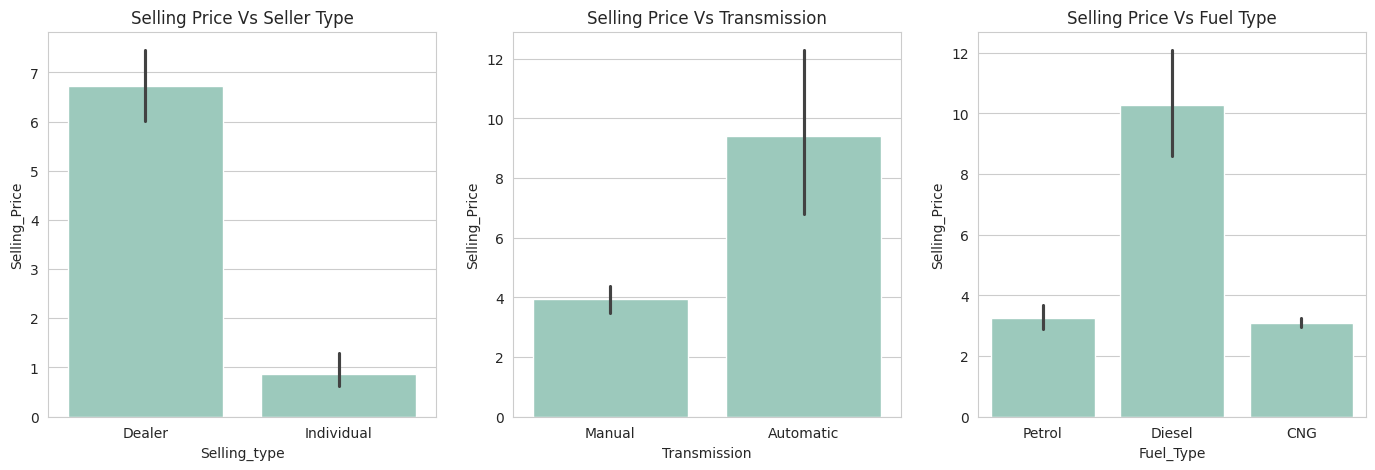

In [ ]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(x='Selling_type', y='Selling_Price',data=data)
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(x='Transmission',y='Selling_Price',data=data)
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(x='Fuel_Type',y='Selling_Price',data=data)
plt.title('Selling Price Vs Fuel Type')

plt.show()


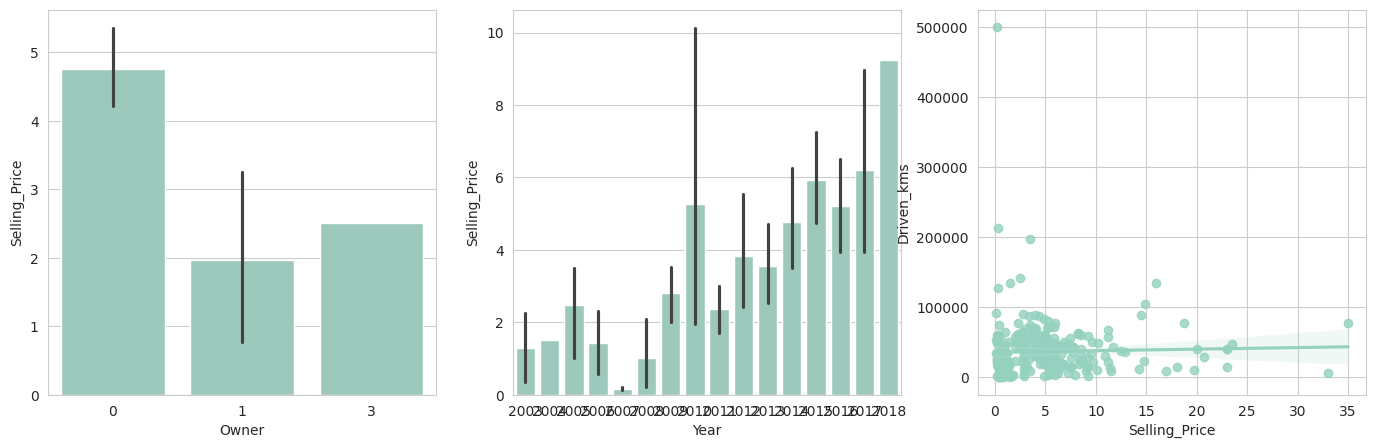

In [ ]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(x='Owner',y='Selling_Price',data=data)

plt.subplot(1,3,2)
sns.barplot(x='Year',y='Selling_Price',data=data)

plt.subplot(1,3,3)
sns.regplot(x='Selling_Price',y='Driven_kms',data=data)
plt.show()

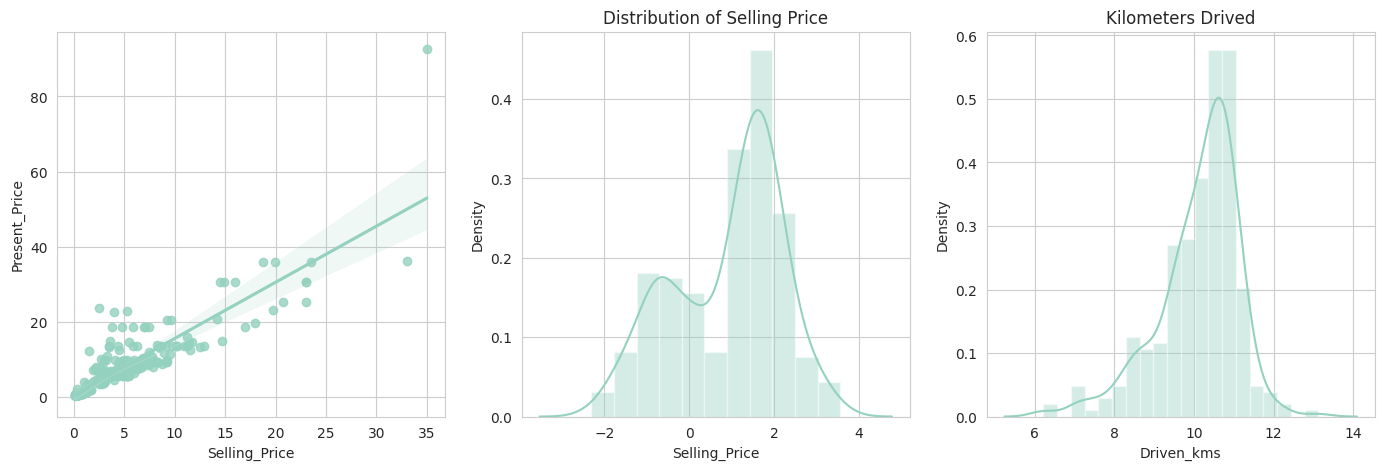

In [ ]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.regplot(x='Selling_Price',y='Present_Price',data=data)

plt.subplot(1,3,2)
sns.distplot(np.log(data['Selling_Price']))
plt.title('Distribution of Selling Price')


plt.subplot(1,3,3)
sns.distplot(np.log(data['Driven_kms']))
plt.title('Distribution of KMS Drived')


plt.title('Kilometers Drived')
plt.show()

In [ ]:
data = data.drop(labels='Car_Name', axis=1)
clean_data = pd.get_dummies(data,drop_first=True)

In [ ]:
columns_to_drop = ['Driven_kms', 'Fuel_Type']
existing_columns = [col for col in columns_to_drop if col in clean_data.columns]
data_no_multicolinearity = clean_data.drop(existing_columns, axis=1)

<Axes: >

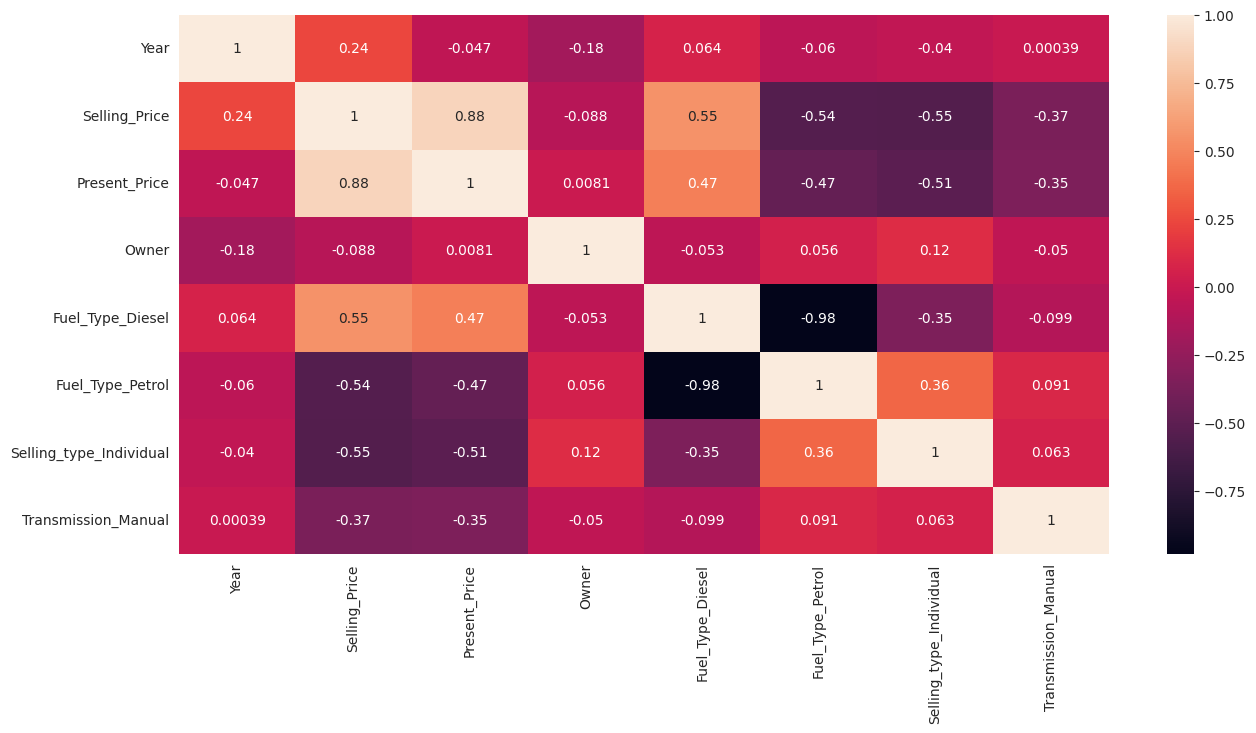

In [ ]:
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multicolinearity.corr(), annot=True)

In [ ]:
from sklearn.feature_selection import f_regression,SelectKBest

X = data_no_multicolinearity.drop('Selling_Price',axis=1)
y = data_no_multicolinearity['Selling_Price']

f_regression(X,y)

p_values = f_regression(X,y)[1]

p_values.round(3)

array([0.   , 0.   , 0.126, 0.   , 0.   , 0.   , 0.   ])

In [ ]:
model_summry = pd.DataFrame(data=['Present_Price','Selling_Price', 'Owner', 'Year', 'Fuel_Type',
                              'Selling_type', 'Transmission'], columns=['Features'])
model_summry['p_values'] = p_values.round(3)
model_summry.head()

,Features,p_values
0,Present_Price,0.000
1,Selling_Price,0.000
2,Owner,0.126
3,Year,0.000
4,Fuel_Type,0.000


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

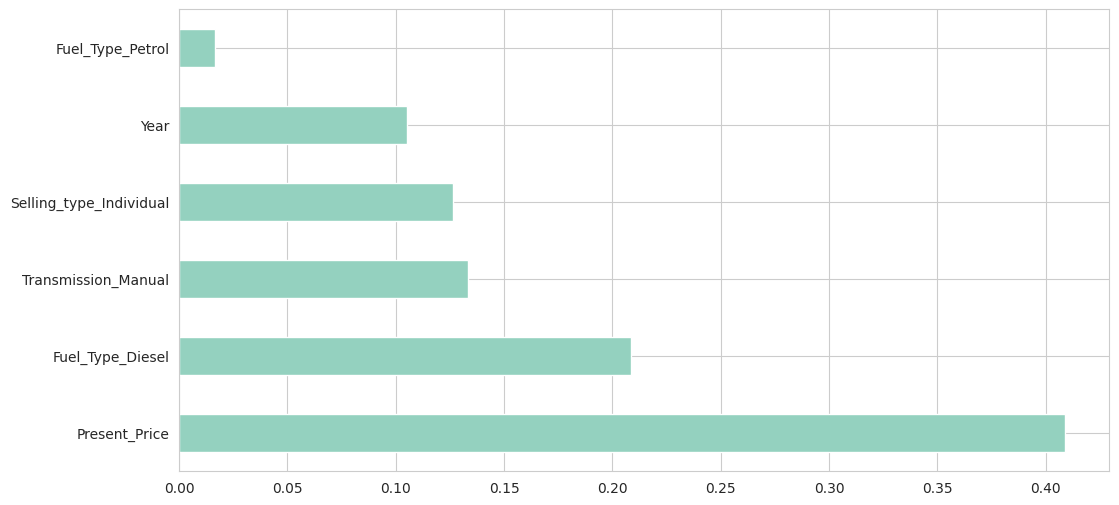

In [ ]:
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()


In [ ]:
print(feat_importances.sort_values(ascending=False))

Present_Price              0.408838
Fuel_Type_Diesel           0.208501
Transmission_Manual        0.133271
Selling_type_Individual    0.126637
Year                       0.105326
Fuel_Type_Petrol           0.016467
Owner                      0.000960
dtype: float64


In [ ]:
data_no_multicolinearity.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Owner', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual'],
      dtype='object')

In [ ]:
print(data_no_multicolinearity.columns)
data_no_multicolinearity.columns = data_no_multicolinearity.columns.str.strip()
data_no_multicolinearity = pd.read_csv('/content/car_price_prediction.csv', encoding='utf-8-sig')
data_no_multicolinearity = data_no_multicolinearity.reset_index()

Index(['Year', 'Selling_Price', 'Present_Price', 'Owner', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual'],
      dtype='object')


In [ ]:
final_df = data_no_multicolinearity[['Selling_Price', 'Present_Price', 'Year',
       'Fuel_Type', 'Selling_type', 'Transmission']]

In [ ]:
final_df.head()

,Selling_Price,Present_Price,Year,Fuel_Type,Selling_type,Transmission
0,3.35,5.59,2014,Petrol,Dealer,Manual
1,4.75,9.54,2013,Diesel,Dealer,Manual
2,7.25,9.85,2017,Petrol,Dealer,Manual
3,2.85,4.15,2011,Petrol,Dealer,Manual
4,4.60,6.87,2014,Diesel,Dealer,Manual
